<!-- Customize the font and markdown size -->
# Custom RL Algorithm with ev2gym gym environment🚗🚗🔋🔋📉
---

This Notebook provides a simple example of how to develop your own custom RL environment using the OpenAI Gym interface. We will use the **simple configuration of ev2gym** for the power *setpoint tracking problem*. We will then train a simple DQN agent to solve the environment.


**Learning Objectives:**
- Familiarize with the OpenAI Gym interface
- Develop a DQN agent for a simple environment

### 1. Creating the Environment 🚗

- ev2gym simulates a Charge Point Operator (CPO) controlling a **fixed number of charging stations** scattered in a city where EVs that arrive and depart.

- The goal of the CPO is to **minimize the difference between the power setpoint and the actual power** consumed by the charging stations.

 - The CPO can control the current(**A**) of each port of each charging station. The current is limited by the **maximum current**(**I**) of the charging station and the **maximum current**(**I**) of the port.



In [ ]:
#Install the required packages
# pip install ev2gym


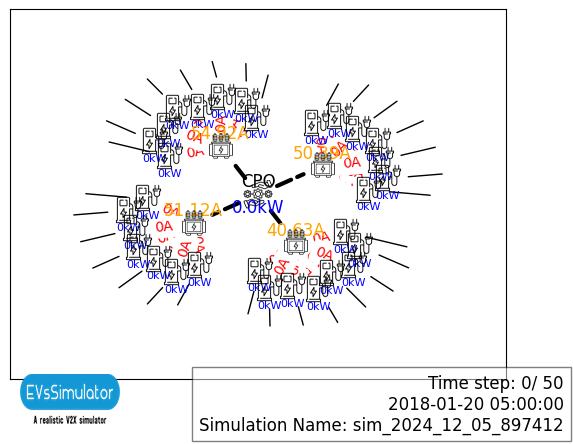

In [23]:
import os 
import random
import numpy as np
from itertools import count
from ev2gym.models.ev2gym_env import EV2Gym
# we will use an example configuration file
config_name = 'test.yaml'
config_file = os.path.dirname(os.getcwd())+'/ev2gym/example_config_files/' + config_name
# Creating the environment
env = EV2Gym(config_file,
             render_mode=True,
             seed=42,
             save_plots=False,
             save_replay=False,)

In [24]:
#Get the initial state
state, _ = env.reset()
print(state, _)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] {}


In [ ]:

episode_rewards = []
episode_stats = []
def reward_function(x,c,s,y):
    return 0
env.set_reward_function(reward_function)

num_episodes = 1
    
    

for i_episode in range(num_episodes):
    # Initialize the environment and get it's state
    state, _ = env.reset()
    
    episode_reward = 0
    for t in count():
        action = np.random.random(env.cs)  
        # print(action)
        observation, reward, done, truncated, stats = env.step(action)
        episode_reward += reward    
        # print(observation)
        print(env.charge_prices)
        if done:
            next_state = None
        else:
            next_state = observation


        # Move to the next state
        state = next_state
        if done:
            episode_rewards.append(episode_reward)
            episode_stats.append(stats)
            print(f'Iteration {i_episode}/{num_episodes}: Episode reward: {episode_reward} ')
            
            break

print('Complete')


[0.02 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
[0.04 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
[0.06 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0. 

Plot the total rewards per episode to see how the agent improved during training.

In [ ]:
#Plot the rewards
from matplotlib import pyplot as plt

plt.plot(episode_rewards)
plt.ylabel('Episode reward')
plt.xlabel('Episode')
plt.show()


Plot other metrics from the info dictionary returned by the environment. For example, the number of times the agent charged or discharged the EVs.

In [ ]:
#plot episode stats
import pandas as pd
episode_stats = pd.DataFrame(episode_stats)
#Select only the columns we want to plot
episode_stats = episode_stats[['total_energy_charged','tracking_error']]

#plot
episode_stats.plot(subplots=True, figsize=(10,10))
